# Modelling

In [127]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_selection import chi2, r_regression, f_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import exp as exp
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

In [59]:
# load our clean df created from Cleaning-and-EDA
df_clean = pd.read_csv('Data/clean_df.csv')
seniors = df_clean[df_clean['senior']==1]

In [60]:
df_clean['senior'].value_counts()

0    820
1    244
Name: senior, dtype: int64

In [61]:
#establish x and y variables
x = df_clean[['Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E']]#,'Q28_3F']]
y = df_clean['uses_pt']

In [62]:
y.value_counts()

0    872
1    192
Name: uses_pt, dtype: int64

In [63]:
# #Create Dummy columns for rural vs urban variable
# x = pd.get_dummies(x,columns=['D26'],drop_first=True)
# x

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

<AxesSubplot: >

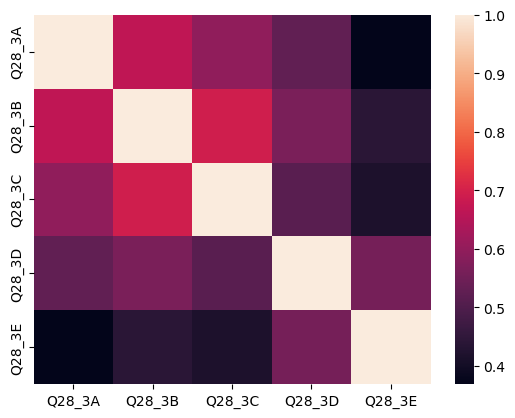

In [65]:
sns.heatmap(x.corr())

In [133]:
sklearn_logit = LogisticRegression(penalty='none')

In [134]:
sklearn_logit.fit(x_train, y_train)

LogisticRegression(penalty='none')

In [135]:
sklearn_logit.score(x_test, y_test)

0.8153409090909091

In [136]:
precision_scores = []
recall_scores = []

y_pred = sklearn_logit.fit(x_train, y_train).predict(x_test)
precision_scores.append(precision_score(y_test, y_pred, average='micro'))
recall_scores.append(recall_score(y_test, y_pred, average='micro'))

print(precision_scores)
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(precision_scores), np.std(precision_scores) * 2))
print(recall_scores)
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(recall_scores), np.std(recall_scores) * 2))

[0.8153409090909091]
Recall: 0.82 (+/- 0.00)
[0.8153409090909091]
Recall: 0.82 (+/- 0.00)


In [137]:
scores, pvalues = chi2(x_train, y_train)
print('Question \t coef \t\t p-val \t chi2')
for i,var in enumerate(x.columns):
    print(f'{var}: \t {round(sklearn_logit.coef_[0][i],3)}\t\t{round(pvalues[i],4)}\t{round(scores[i],3)}')

Question 	 coef 		 p-val 	 chi2
Q28_3A: 	 0.558		0.0	26.478
Q28_3B: 	 0.263		0.0002	13.943
Q28_3C: 	 -0.139		0.0047	7.991
Q28_3D: 	 0.575		0.0002	14.107
Q28_3E: 	 -0.387		0.349	0.877


In [126]:
pearsons = r_regression(x_train,y_train)
pearsons

array([0.29782012, 0.24477097, 0.19302426, 0.24537148, 0.06502572])

In [129]:
f_stat, f_p_vals = f_regression(x_train, y_train)
f_p_vals

array([4.74757523e-16, 3.57263324e-11, 2.09878863e-07, 3.18926663e-11,
       8.29377369e-02])

In [99]:
sklearn_logit.predict(np.array([4, 5, 0, 5, 4]).reshape(1,-1))[0]

C:\Users\Matt\mambaforge\envs\DTSC\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [104]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475598
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                uses_pt   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                0.003750
Time:                        15:21:03   Log-Likelihood:                -338.63
converged:                       True   LL-Null:                       -339.90
Covariance Type:            nonrobust   LLR p-value:                    0.6359
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Q28_3A         0.5601      0.136      4.113      0.000       0.293       0.827
Q28_3B         0.0190      0.

In [16]:
log_reg = sm.Logit(y_train,x_train)

In [17]:
log_reg.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Users\Tonyj\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Changing Gears to ANOVA table

In [18]:
df_anova_seniors = df_clean[df_clean['senior'] == 1]
df_anova_seniors = df_anova_seniors[['uses_pt','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']]
df_anova_seniors

,uses_pt,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
0,0,1.0,1.0,1.0,1.0,5.0,5.0
1,0,5.0,5.0,5.0,4.0,4.0,5.0
6,0,3.0,5.0,4.0,4.0,5.0,5.0
8,0,2.0,2.0,2.0,2.0,1.0,1.0
10,0,4.0,3.0,4.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...
1043,0,4.0,2.0,4.0,4.0,4.0,4.0
1048,1,4.0,5.0,5.0,5.0,4.0,4.0
1052,1,4.0,5.0,5.0,4.0,4.0,4.0
1055,0,4.0,4.0,4.0,3.0,4.0,3.0


In [19]:
df_anova_seniors_vs_rest = df_clean[['senior','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']]
df_anova_seniors_vs_rest

,senior,Q28_3A,Q28_3B,Q28_3C,Q28_3D,Q28_3E,Q28_3F
0,1,1.0,1.0,1.0,1.0,5.0,5.0
1,1,5.0,5.0,5.0,4.0,4.0,5.0
2,0,2.0,3.0,3.0,3.0,3.0,2.0
3,0,4.0,3.0,4.0,2.0,3.0,2.0
4,0,3.0,3.0,2.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...
1059,0,2.0,2.0,4.0,2.0,3.0,3.0
1060,0,3.0,3.0,3.0,3.0,5.0,5.0
1061,0,1.0,4.0,1.0,1.0,4.0,4.0
1062,0,1.0,1.0,5.0,5.0,5.0,5.0


In [20]:
df_anova_use_vs_dont = df_clean[['uses_pt','Q28_3A','Q28_3B','Q28_3C','Q28_3D','Q28_3E','Q28_3F']]
df_anova_use_vs_d

NameError: name 'df_anova_use_vs_d' is not defined

In [ ]:
#https://www.reneshbedre.com/blog/anova.html
# Ordinary Least Squares (OLS) model
#in progress
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table